# Cell Complexes

## Setup

In [3]:
import numpy as np

from toponetx import CellComplex as cx

## Cell Complex

In mathematics, a cell complex is a space that is constructed by attaching lower-dimensional cells to a topological space to form a new space. The cells are attatched to the space in a specific way, and the resulting space has a well-defined structure.

For example, a cell complex can be used to represent a simplicial complex, which is a collection of points, line segments, triangles, and higher-dimensional simplices that are connected in a specific way. Each simplex in the simplicial complex is called a cell, and the cell complex consists of all of these cells *and* the way they are connected.

A cell complex is a mathematical structure consisting of a set of points (called vertices or 0-cells), a set of line segments (called edges or 1-cells), and a set of polygons (called faces or 2-cells), such that the vertices, edges, and faces are connected in a consistent way.

The dimension of a cell c ∈ X is denoted by d(c), and the dimension of a cell complex is the largest dimension of one of its cells. $[1]$

## Example of a Cell Complex

Two examples of cell complex can be seen below. 

The left diagram is made up of vertices (0-cells) and edges (1-cells), as the highest dimension object is a 1-cell then this cell complex also had a dimension 1. This diagram has 8 0-cells and 9 1-cells.

The right diagram is made up of vertices (0-cells), edges (1-cells) and faces (2-cells). The highest dimension cell is a 2-cell so the dimension of this cell-complex is 2. This diagram has 9 0-cells, 11 1-cells and 2 2-cells. 


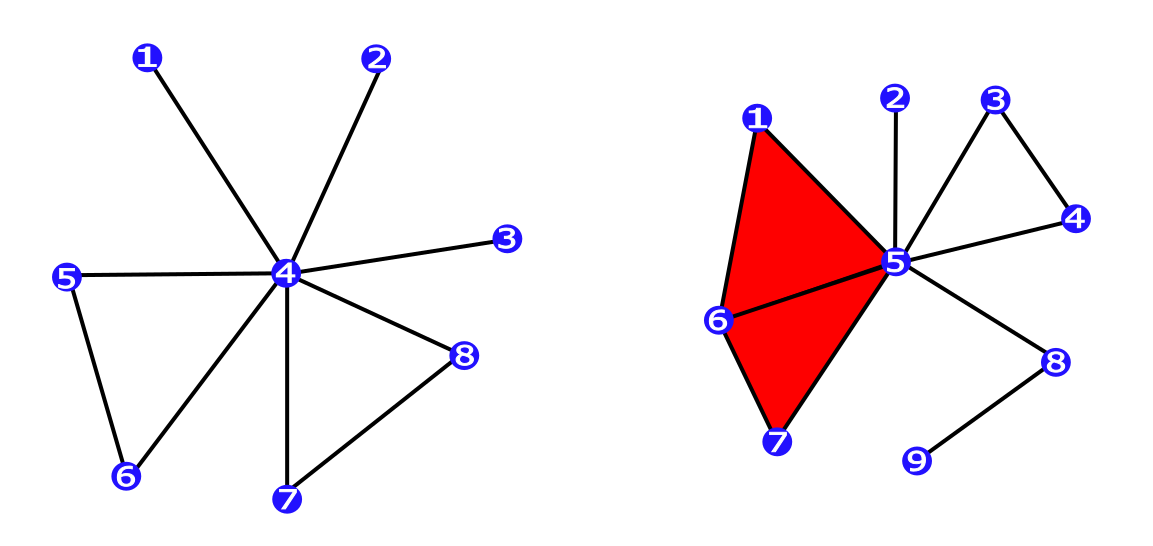

## Example Continued

In [4]:
example_1 = cx()
print(example_1)

example_1.add_cell([1, 4], rank=1)
print(example_1)

example_1.add_cells_from(
    [[2, 4], [3, 4], [4, 5], [5, 6], [4, 6], [4, 7], [7, 8], [4, 8]], rank=1
)
print(example_1)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 2 nodes, 1 edges  and 0 2-cells 
Cell Complex with 8 nodes, 9 edges  and 0 2-cells 


Using this code creates the cell complex on the left, for now we are calling this example_1. 

The first line is the creation of the cell complex, printing this we can see that it is okay to have empty cell complexes.

Next we want to add the 1-cells and 0-cells, this can be done using the `add_cell` function on line 4 or the `add_cells_from` function on line 7. 

The `add_cell` function is a way of adding individual cells, the rank is where you determine the dimension of the cell you are adding. This can be seen in comparing the first and second lines in the outputs, the cell complex goes from having 0 nodes, edges and 2-cells to having 2 nodes and 1 edge. This is because we have added the edge $[1,4]$ which is made of two nodes 1,4 and one edge that connects them. 

The `add_cells_from` function is a way of adding multiple cells at once. This is done by defining a set of multiple cells with the function, instead of just an individual cell. Again, we need to define the rank of the cells, as this graph is just made up of nodes and edges the rank has always been 1. The addition of multiple cells can be seen in the difference between the second and third lines of the output, where there is an addition of 6 nodes and 8 edges. Comparing the third line of the output with the diagram, we can see that the code used to create example_1 does portray the left diagram above. 

If we had a node without any vertices attatched to it, say the edge between 1 and 4 did not exist, we could add this node with 

`example_1.add_cell([1], rank = 0)` 

as the dimension of a node is 0. 

In [6]:
example_2 = cx()
print(example_2)

example_2.add_cell([1, 5, 6], rank=2)
print(example_2)

example_2.add_cells_from([[5, 6, 7]], rank=2)
print(example_2)

example_2.add_cells_from([[2, 5], [3, 4], [3, 5], [4, 5], [5, 8], [8, 9]], rank=1)
print(example_2)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 3 nodes, 3 edges  and 1 2-cells 
Cell Complex with 4 nodes, 5 edges  and 2 2-cells 
Cell Complex with 9 nodes, 11 edges  and 2 2-cells 


For the diagram on the right, the same approach is used. However, this time, we also have 2-cells. 

The first line, again, is creating the cell complex and naming it example_2. 

The fourth line is using the previous `add_cell` function to add the 2-cell $[1,5,6]$. From the diagram we know it is a 2-cell because the face is coloured in red, from the code we know it is a 2-cell because we have set the rank equal to 2. 

In the seventh line, we see that the `add_cells_from` function can be used for 2-cells too, and can be used even if only adding one. In the tenth line we use the same function to add all of the edges, as these are of rank 1. 

Looking at the second line of the input, we can see that the addition of a 2-cell increases not only that but also the nodes and edges, because the 2-cell is made up of nodes and edges too.

# Example 

Using the example from above titled 'example_2', we can look at using the incidence matrix to retrieve information about the cell complex. This is useful for retreieving information such as the list of edges and the list of 2-cells.

In [7]:
row, column, B2 = example_2.incidence_matrix(2, index=True)
print("edges:")
print(row)
print("2-cells:")
print(column)

edges:
{(1, 5): 0, (1, 6): 1, (2, 5): 2, (3, 4): 3, (3, 5): 4, (4, 5): 5, (5, 6): 6, (5, 7): 7, (5, 8): 8, (6, 7): 9, (8, 9): 10}
2-cells:
{(1, 5, 6): 0, (5, 6, 7): 1}


We can see from the output there are 11 edges, just like the example_2 diagram, and they have been numbered 0 to 10. The numbering system allows us to know which edges we are referring to for the up-Laplacian and down-Laplacian later on.

Similarly, we have the two 2-cells, and numbering for both of them. 

## up-Laplacian 

### Definition up-Laplacian

<ins>*Degree 0:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 0-cells in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ 0-cell is not incident to j$^{th}$ 0-cell via a 1-cell incident to i$^{th}$ 0-cell, $\neq$ 0 if it is incident.

For i = j,

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ 0-cell is incident to n 1-cells. 

<ins>*Degree 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of 1-cells in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ 1-cell is not incident to j$^{th}$ 1-cell via a 2-cell incident to i$^{th}$ 1-cell, $\neq$ 0 if it is incident.

For i = j, 

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ 1-cell is incident to n 2-cells. 

### Example of up-Laplacian

To look at the application of different functions, we will be using example_2 from above. We will also utilise the outputs of the incidence matrix to know which edges we may be referring to.

Looking at the diagram below we can follow the process of the up-Laplacian operator, this is an up-Laplacian of dimension 2 as it is going from edges to 2-cells back to edges.

So starting of with the diagram, we then choose an edge - in this case we have chosen the edge $[1,5]$. From the incidence matrix above, we know that this edge is edge 0. Next, we go 'up' to the next dimension, of any 2-cells that are incident to this edge. In this case, it is incident to the 2-cell $[1,5,6]$. Finally, we list the edges incident to the 2-cell $[1,5,6]$ which are the edges $[1,5], [1,6], [5,6]$. From the incidence matrix above we know that these are the edges 0, 1 and 6. 

This is seen in the matrix below titled 'example_2_up', as the first row is referring to our edge $[1,5]$ and we can see there are non-zero entries in the 0th, 1st and 6th columns of this row as those are the edges incident via the up-Laplacian. 

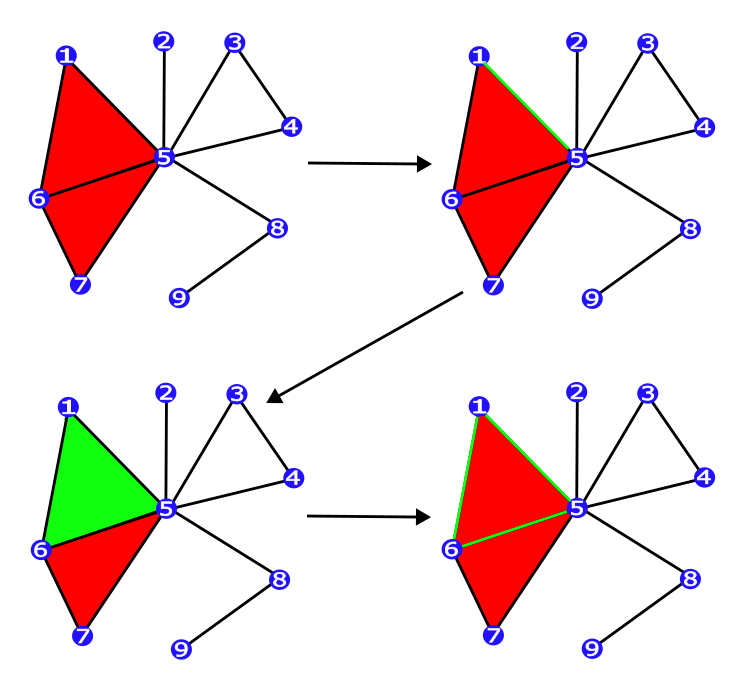

In [8]:
example_2_up = example_2.up_laplacian_matrix(1).todense()

print(example_2_up)

[[ 1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  2. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Looking at the printed up-Laplacian matrix there are a few things we can note to understand more about the information it is conveying.

The diagonal of the up-Laplacian matrix describes how many 2-cells are incident to that edge. This means that the element $[j,j]$ is how many 2-cells are incident to the j$^{th}$ edge. 


Looking at the matrix, we can see that the first row has non-zero elemenst in the 0$^{th}$, 1$^{st}$ and 6$^{th}$ places. This is showing that the first edge $[1,5]$ is incident via a 2-cell to the 0$^{th}$, 1$^{st}$ and 6$^{th}$ edges as decribed above. 

Looking at the 3$^{rd}$, 4$^{th}$, 5$^{th}$, 6$^{th}$, 9$^{th}$ and 11$^{th}$ rows are all zero-values. This tells us that these edges and not incident to any other edges via a 2-cell. This is because these edges are not adjacent to any 2-cells, this fact is reconfirmed because they do not have a non-zero diagonal value. 

An up-Laplacian can have degrees of 0 and 1 because we can go 'up' from vertices for degree 0 and 'up' from edges for degree 1, but we cannot go 'up' from 2-cells. 

In [15]:
print(example_2.up_laplacian_matrix(0).todense())

[[ 2.  0.  0.  0. -1. -1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  2. -1. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [-1. -1. -1. -1.  7. -1. -1. -1.  0.]
 [-1.  0.  0.  0. -1.  3. -1.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.]]


This is the up-Laplacian of degree 0. This is looking 'up' from each vertex to its adjacent edges and then outputting the adjacent vertices to those edges. As example_2 has 9 vertices, this is a 9x9 matrix. 

## down-Laplacian

### Definition of down-Laplacian

<ins>*Degree 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of edges in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ edge is not incident to j$^{th}$ edge via a vertex incident to i$^{th}$ edge, $\neq$ 0 if it is incident.

For i = j, 

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ edge is incident to n vertices. 

<ins>*Degree 2:*</ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of faces in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ 2-cell is not incident to j$^{th}$ 2-cell via an edge incident to i$^{th}$ 2-cell, $\neq$ 0 if it is incident.

For i = j, 

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ 2-cell is incident to n edges. 

### Example of down-Laplacian

Looking at the diagram below we can follow the process of the down-Laplacian operator, this is an down-Laplacian of dimension 1 as it is going from edges to vertices back to edges.

Similarly to the up-Laplacian we choose an edge - in this case we have chosen the edge $[1,5]$. From the incidence matrix above, we know that this edge is edge 0. Next, we go 'down' to the next dimension, of any vertices that are incident to this edge. In this case, it is incident to the vertcies $1,5$. Finally, we list the edges incident to the vertcies $1,5$ which are the edges $[1,5], [1,6], [2,5], [3,5], [4,5], [5,6], [5,7], [5,8]$. From the incidence matrix above we know that these are the edges 0, 1, 2, 4, 5, 6, 7, 8. 

This is seen in the matrix below titled 'example_2_down', as the first row is referring to our edge $[1,5]$ and we can see there are non-zero elements in the 0$^{th}$, 1$^{st}$, 2$^{nd}$, 4$^{th}$, 6$^{th}$, 7$^{th}$ and 8$^{th}$ entries of this row as those are the edges incident via the down-Laplacian. 

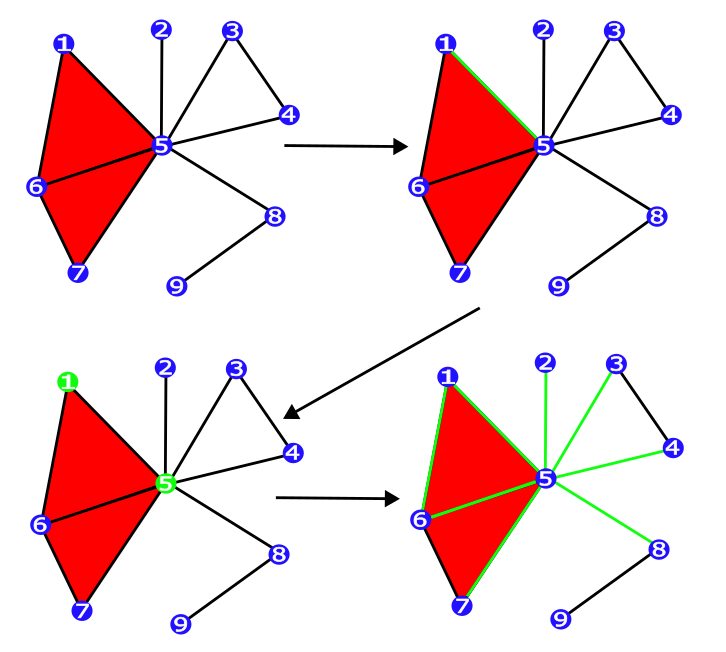

In [9]:
example_2_down = example_2.down_laplacian_matrix(1).todense()

print(example_2_down)

[[ 2.  1.  1.  0.  1.  1. -1. -1. -1.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  1.  0.  0. -1.  0.]
 [ 1.  0.  2.  0.  1.  1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0.  2.  1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  2.  1. -1. -1. -1.  0.  0.]
 [ 1.  0.  1. -1.  1.  2. -1. -1. -1.  0.  0.]
 [-1.  1. -1.  0. -1. -1.  2.  1.  1. -1.  0.]
 [-1.  0. -1.  0. -1. -1.  1.  2.  1.  1.  0.]
 [-1.  0. -1.  0. -1. -1.  1.  1.  2.  0. -1.]
 [ 0. -1.  0.  0.  0.  0. -1.  1.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  2.]]


Looking at the first row of this matrix, we can see that there are 8 non-zero entries in this row. This correlates to the example above as the first row is presentin the edge $[1,5]$. The non-zero entries relate to the edges 0, 1, 2, 4, 5, 6, 7, 8. 

The diagonal of this matrix is similiar to that of the up-Laplacian but instead describes how many objects of the dimension below it is incident to, so in this example the element $[j,j]$ describes how many vertices the j$^{th}$ element is incident to. 

A down-Laplacian can have degrees 1 and 2, this is because you can go 'down' to vertices from edges and 'down' to edges from 2-cells. However, there is nowhere to go 'down' to from vertices. 

## Hodge Laplacian

### Defintion of Hodge Laplacian

Hodge Laplacian matrix has entry H(i,j), made from up-Laplacian values (i$_{up}$, j$_{up}$) and down-Laplacian values (i$_{down}$, j$_{down}$) such that

H(i,j) = (i$_{up}$, j$_{up}$) + (i$_{down}$, j$_{down}$). 

That is, any entry (i,j) in the Hodge Laplacian matrix is generated by the addition of the equivalent (i,j) values in the up-Laplacian and down-Laplacian matrices. 

### Relation of Hodge Laplacian to up-Laplacian and down-Laplacian

From our definition of Hodge Laplacian, and given what we know about up-Laplacian and down-Laplacian, it may cause us to think about the fact that up-Laplacian only has degrees of 0 and 1 and that down-Laplacian only has degrees of 1 and 2. This means that when we are finding the Hodge Laplacian of degree 0, there are no (i$_{down}$, j$_{down}$) values to be added to H(i,j). Similarly, for a Hodge Laplacian of degree 2, there are no (i$_{up}$, j$_{up}$) values to be added to H(i,j). This leads to the following:

Hodge Laplacian degree 0: H(i,j) = (i$_{up}$, j$_{up}$)

Hodge Laplacian degree 1: H(i,j) = (i$_{up}$, j$_{up}$) + (i$_{down}$, j$_{down}$)

Hodge Laplacian degree 2: H(i,j) = (i$_{down}$, j$_{down}$). 

In [10]:
# hodge laplacian matrix degree 0
hodge_laplacian_0 = example_2.hodge_laplacian_matrix(0).todense()

print(hodge_laplacian_0)

[[ 2.  0.  0.  0. -1. -1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  2. -1. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [-1. -1. -1. -1.  7. -1. -1. -1.  0.]
 [-1.  0.  0.  0. -1.  3. -1.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.]]


This is the Hodge Laplacian matrix of degree 0 for 'example_2'. From our definition of Hodge Laplacian we know that this is just the up-Laplacian matrix of degree 0, and by directly comparing it to the up-Laplacian matrix above confirms this. 

In [12]:
# hodge laplacian matrix degree 1
hodge_laplacian_1 = example_2.hodge_laplacian_matrix(1).todense()

print(hodge_laplacian_1)

[[ 3.  0.  1.  0.  1.  1.  0. -1. -1.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 1.  0.  2.  0.  1.  1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0.  2.  1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  2.  1. -1. -1. -1.  0.  0.]
 [ 1.  0.  1. -1.  1.  2. -1. -1. -1.  0.  0.]
 [ 0.  0. -1.  0. -1. -1.  4.  0.  1.  0.  0.]
 [-1.  0. -1.  0. -1. -1.  0.  3.  1.  0.  0.]
 [-1.  0. -1.  0. -1. -1.  1.  1.  2.  0. -1.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  2.]]


This is the Hodge Laplacian matrix of degree 1, which is the addition of the up-Laplacian and down-Laplacian matrices of degree 1. 

Take entry $[0,0]$ which has a value of 3. This is because the down-Laplacian of degree 1 has a value of 2 and the up-Laplacian of degree 1 has a value of 1 for the $[0,0]$ entry. 

In [13]:
# hodge_laplacian_2
hodge_laplacian_2 = example_2.hodge_laplacian_matrix(2).todense()

print(hodge_laplacian_2)

[[3. 1.]
 [1. 3.]]


This is the Hodge Laplacian matrix of degree 2, which is the same as the down-Laplacian matrix of degree 2. This is the smallest size matrix because it is based off of 2-cells, and example_2 only has two 2-cells resulting in a 2x2 matrix.

## References

$[1]$ : Hajij, M., Istvan, K. and Zamzmi, G. (n.d.). CELL COMPLEX NEURAL NETWORKS. [online] Available at: https://arxiv.org/pdf/2010.00743.pdf [Accessed 10 Feb. 2023].